In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import ensemble
from sklearn.metrics import classification_report

In [210]:
nba_final_df = pd.read_csv('nba_final2.csv')

In [211]:
print(nba_final_df.columns)

Index(['PLAYER', 'TEAM_SH', 'G', 'GS', 'MP', 'TRB', 'AST', 'STL', 'BLK',
       'PS/G', 'GP', 'W', 'L', 'NETRTG', 'TS%', 'PIE', 'MPG', 'RPM', 'WINS',
       'pageviews', 'TWITTER_FAVORITE_COUNT', 'TWITTER_RETWEET_COUNT', 'TEAM',
       'SALARY', 'AVG', 'PCT'],
      dtype='object')


In [212]:
nba_final_df2 = nba_final_df

In [213]:
nba_final_df2['FULL_SOCIAL_MEDIA'] = nba_final_df2['TWITTER_FAVORITE_COUNT'] + nba_final_df2['TWITTER_RETWEET_COUNT'] + nba_final_df2['pageviews'] 

In [214]:
# Labels are the values we want to predict
labels = np.array(nba_final_df2['FULL_SOCIAL_MEDIA'])
# Remove the labels from the features
# axis 1 refers to the columns
features = nba_final_df2.drop('FULL_SOCIAL_MEDIA', axis = 1)
features = features.drop('TWITTER_FAVORITE_COUNT', axis = 1)
features = features.drop('TWITTER_RETWEET_COUNT', axis = 1)
features = features.drop('pageviews', axis = 1)
features = features.drop('PLAYER', axis = 1)
features = features.drop('TEAM_SH', axis = 1) 
features = features.drop('TEAM', axis = 1)
features = features.drop('SALARY', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [215]:
print(feature_list)

['G', 'GS', 'MP', 'TRB', 'AST', 'STL', 'BLK', 'PS/G', 'GP', 'W', 'L', 'NETRTG', 'TS%', 'PIE', 'MPG', 'RPM', 'WINS', 'AVG', 'PCT']


In [216]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [217]:
_,testplayers,_,_ = train_test_split(nba_final_df2.PLAYER.values, nba_final_df2.PLAYER.values, test_size = 0.25, random_state = 42)
trainplayers,_,_,_ = train_test_split(nba_final_df2.PLAYER.values, nba_final_df2.PLAYER.values, test_size = 0.25, random_state = 42)

In [218]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (339, 19)
Training Labels Shape: (339,)
Testing Features Shape: (113, 19)
Testing Labels Shape: (113,)


In [219]:
rf = RandomForestRegressor(random_state = 42)

In [220]:
rf.fit(train_features, train_labels);

C:\Users\ngmat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [221]:
predictions = rf.predict(test_features)

In [222]:
print(mean_squared_error(test_labels, predictions)**0.5)
print(np.mean(test_labels))

1103.0457828889182
500.23964753786856


In [223]:
print(test_labels - predictions)

[ 5.81556571e+01 -2.09867229e+02  3.48016423e+01  1.28612014e+02
  1.01234214e+02 -5.20772859e+01 -4.69172859e+01  2.22063044e+02
  1.58604815e+02  1.93137957e+02  8.17408006e+01  1.17247367e+03
  8.63223577e+01 -1.04412615e+02  1.94774187e+02 -1.60352758e+02
 -1.26060786e+02 -7.14243000e+01 -1.75949486e+02 -1.67596423e+01
  2.20370844e+02 -1.89196472e+02 -1.50666043e+02  1.27059571e+01
 -1.65273900e+02  5.54861282e+01  1.04836015e+02  1.99016801e+02
 -7.30208282e+01  3.23487117e+00  7.88538528e+00  6.26878141e+01
  8.30671141e+01 -1.52418086e+02 -6.74394294e+00  3.99104396e+03
  3.93530216e+03  1.52191015e+02  2.17612000e+01  9.08645814e+02
  1.74593458e+02 -1.46125615e+02 -9.28768429e+01  1.69417358e+02
 -1.47677786e+02  9.62445436e+01  9.23313057e+02  1.24024015e+02
  8.38473436e+01  1.35851500e+02  7.45480712e+01 -2.58166486e+02
 -1.63125214e+03  8.66703147e+01 -1.07302515e+02 -1.47953586e+02
 -1.97699086e+02 -4.20993718e+01 -2.26996101e+02 -5.63207134e+03
 -1.48638658e+02  1.20991

In [224]:
pred_diff = predictions - test_labels

In [225]:
mostor = np.argmin(pred_diff)
mostud = np.argmax(pred_diff)
print(mostor)
print(mostud)
print(testplayers[mostor])
print(testplayers[mostud])

35
104
Kyrie Irving
Chris Paul


In [226]:
dictionary = dict(zip(feature_list, rf.feature_importances_))
print(dictionary)

{'G': 0.0008934268429600017, 'GS': 0.0013539048880033028, 'MP': 0.007341062769483761, 'TRB': 0.024888233825043148, 'AST': 0.004366280946311799, 'STL': 0.01326423818233415, 'BLK': 0.09548401152263832, 'PS/G': 0.0522270653060025, 'GP': 0.0017752944336265834, 'W': 0.01466694440736752, 'L': 0.023383111473357785, 'NETRTG': 0.008555741814274126, 'TS%': 0.011087437810866352, 'PIE': 0.005046796113216872, 'MPG': 0.08191766534594093, 'RPM': 0.3189186139869267, 'WINS': 0.288217864683936, 'AVG': 0.012766724081530057, 'PCT': 0.03384558156618012}


No handles with labels found to put in legend.


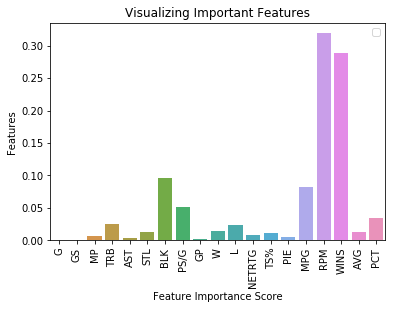

In [227]:
sns.barplot(x=feature_list, y=rf.feature_importances_)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [228]:
rf.score(features, labels)

0.7515440592303381

In [229]:
rf.score(test_features, test_labels)

-0.531725018123451

In [230]:
lm = LinearRegression()
lm.fit(train_features,train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [231]:
predreg = lm.predict(test_features)

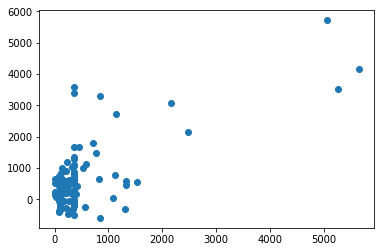

In [232]:
plt.scatter(test_labels,predreg)

In [233]:
lm.score(features, labels)

0.2689741931224148

In [234]:
lm.score(test_features, test_labels)

0.2607684613570822

In [235]:
print(mean_squared_error(test_labels, predreg)**0.5)
print(np.mean(test_labels))

766.2903903783679
500.23964753786856


In [236]:
predreg_diff = predreg - test_labels
mostor = np.argmin(predreg_diff)
mostud = np.argmax(predreg_diff)
print(mostor)
print(mostud)
print(testplayers[mostor])
print(testplayers[mostud])

35
92
Kyrie Irving
Isaiah Thomas


In [237]:
print(lm.coef_)

[-3.79412444e+00 -2.23851463e+00 -1.52767810e+04  4.55256318e+01
  1.87406027e+02  2.10340583e+02  3.32743760e+02  1.71514998e+02
 -3.79412442e+00  4.91422967e+00 -8.70835410e+00  1.21169675e+01
  2.65589586e+01 -1.12921489e+02  1.51630616e+04 -2.48877332e+02
  2.93562812e+02  2.28929555e-01 -2.25791839e+01]


In [238]:
scores = cross_val_score(rf, features, labels, cv=5)

In [239]:
scores2 = cross_val_score(lm, features, labels, cv=5)

In [240]:
print(scores)
print(scores2)

[ 0.4731508   0.29768027 -0.64375698  0.2642301  -1.25321532]
[ 0.32194184  0.19003645 -1.14092659 -0.11097556 -1.97335029]


In [241]:
neigh = KNeighborsRegressor()
neigh.fit(train_features, train_labels) 
neigh.predict(test_features)
print(mean_squared_error(test_labels, neigh.predict(test_features))**0.5)
mostor = np.argmin(neigh.predict(test_features))
mostud = np.argmax(neigh.predict(test_features))
print(mostor)
print(mostud)
print(testplayers[mostor])
print(testplayers[mostud])
neigh.kneighbors(np.atleast_2d(test_features[99]), 5)
fivenear = neigh.kneighbors(np.atleast_2d(test_features[99]), 5)[1]
for i in fivenear:
    print(trainplayers[i])



635.1951681687782
7
99
Mike Miller
Kevin Durant
['Clint Capela' 'Klay Thompson' 'Stephen Curry' 'Draymond Green'
 'Zaza Pachulia']


In [242]:
nba_final_df3 = nba_final_df2

In [243]:
# Labels are the values we want to predict
labels1 = np.array(nba_final_df3['FULL_SOCIAL_MEDIA'])
# Remove the labels from the features
# axis 1 refers to the columns
features1 = nba_final_df3.drop('FULL_SOCIAL_MEDIA', axis = 1)
features1 = features1.drop('TWITTER_FAVORITE_COUNT', axis = 1)
features1 = features1.drop('TWITTER_RETWEET_COUNT', axis = 1)
features1 = features1.drop('pageviews', axis = 1)
features1 = features1.drop('PLAYER', axis = 1)
features1 = features1.drop('TEAM_SH', axis = 1) 
features1 = features1.drop('TEAM', axis = 1)
features1 = features1.drop('SALARY', axis = 1)
features1 = features1.drop('W', axis = 1)
features1 = features1.drop('L', axis = 1)
features1 = features1.drop('AVG', axis = 1)
features1 = features1.drop('PCT', axis = 1)
# Saving feature names for later use
feature1_list = list(features1.columns)
# Convert to numpy array
features1 = np.array(features1)

In [244]:
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features1, labels1, test_size = 0.25, random_state = 42)

In [245]:
rf1 = RandomForestRegressor(random_state = 42)

In [246]:
rf1.fit(train_features1, train_labels1);

C:\Users\ngmat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [247]:
predictions1 = rf1.predict(test_features1)

In [248]:
print(predictions1)

[  71.039       250.94201472  221.30317178  232.02707178  228.52438589
   62.13074294  405.30027178  189.16487178  318.32185767  114.13814294
   41.4559       85.4496      163.98442883  297.32598589  317.2068
  214.00417178  267.77507178 1036.8296      269.49831472  306.59228589
  116.16188589  281.86402883  214.19552883  129.65978589  535.64084294
  247.58365767  210.96857178  165.09488589  305.72914356  217.50347178
  156.02442883  192.94382883  469.09074294  399.41872883   89.98264294
  457.79334294 1886.32284294  232.64501472  349.9673      526.69002883
  116.89004294  188.10074294  158.00624294  189.40377178  363.69662883
  241.99682883 2100.30244294  224.97971472  296.1262      269.59597178
   43.3077      227.9185     2438.58728589  195.62972883  156.93022883
  267.77507178  177.74842883  231.99688589  265.28810061 6864.73114294
  181.40927178  134.84378589  750.53838589  229.48217178  169.6668
  312.32831472  353.66365767  438.54732883  286.22642883  189.61862883
  239.36744294

In [249]:
print(rf1.feature_importances_)

[0.01030092 0.0288669  0.07862728 0.03146963 0.01907158 0.00818223
 0.0948413  0.05544692 0.00746139 0.02141923 0.00917004 0.00986728
 0.02242682 0.23223558 0.3706129 ]


In [250]:
dictionary1 = dict(zip(feature1_list, rf1.feature_importances_))

In [251]:
print(dictionary1)

{'G': 0.010300917953017475, 'GS': 0.028866899390051482, 'MP': 0.07862728411194594, 'TRB': 0.031469630211983554, 'AST': 0.019071580574689318, 'STL': 0.008182230318559709, 'BLK': 0.09484129730527933, 'PS/G': 0.05544692290382243, 'GP': 0.007461385786062501, 'NETRTG': 0.021419234947072936, 'TS%': 0.00917003620000545, 'PIE': 0.009867280913203592, 'MPG': 0.022426816871786073, 'RPM': 0.23223558382913662, 'WINS': 0.37061289868338365}


In [252]:
rf1.score(features1, labels1)

0.7732360180108762

In [253]:
rf1.score(test_features1, test_labels1)

-0.24738672947204665

In [254]:
print(mean_squared_error(test_labels1, predictions1)**0.5)
print(np.mean(test_labels1))

995.4138871849867
500.23964753786856


In [255]:
pred_diff1 = predictions1 - test_labels1
mostor = np.argmin(pred_diff1)
mostud = np.argmax(pred_diff1)
print(mostor)
print(mostud)
print(testplayers[mostor])
print(testplayers[mostud])

35
59
Kyrie Irving
Rudy Gobert


In [256]:
scores = cross_val_score(rf1, features, labels, cv=5)

In [257]:
print(scores)

[ 0.4731508   0.29768027 -0.64375698  0.2642301  -1.25321532]


No handles with labels found to put in legend.


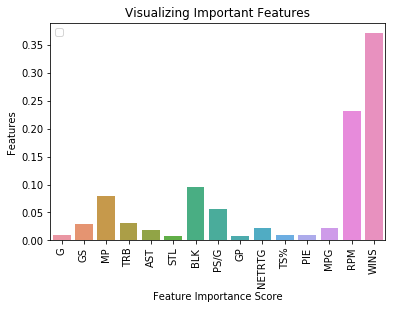

In [258]:
sns.barplot(x=feature1_list, y=rf1.feature_importances_)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [259]:
lm1 = LinearRegression()
lm1.fit(train_features1,train_labels1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [260]:
predreg1 = lm1.predict(test_features1)

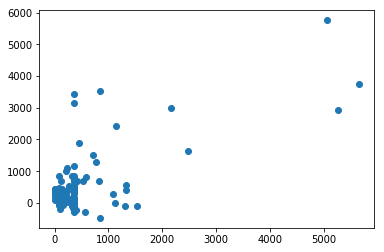

In [261]:
plt.scatter(test_labels1,predreg1)

In [262]:
print(mean_squared_error(test_labels1, predreg1)**0.5)
print(np.mean(test_labels1))

727.1057338120266
500.23964753786856


In [263]:
predreg_diff1 = predreg1 - test_labels1
mostor1 = np.argmin(predreg_diff1)
mostud1 = np.argmax(predreg_diff1)
print(mostor1)
print(mostud1)
print(testplayers[mostor1])
print(testplayers[mostud1])

35
92
Kyrie Irving
Isaiah Thomas


In [264]:
scores2 = cross_val_score(lm1, features, labels, cv=5)

In [265]:
print(scores2)

[ 0.32194184  0.19003645 -1.14092659 -0.11097556 -1.97335029]


In [266]:
nba_final_df4 = nba_final_df

In [267]:
nba_final_df4['FULL_SOCIAL_MEDIA'] = nba_final_df4['TWITTER_FAVORITE_COUNT'] + nba_final_df4['TWITTER_RETWEET_COUNT']

In [268]:
print(nba_final_df4['FULL_SOCIAL_MEDIA'].count())

452


In [269]:
# Labels are the values we want to predict
labels2 = np.array(nba_final_df4['FULL_SOCIAL_MEDIA'])
# Remove the labels from the features
# axis 1 refers to the columns
features2 = nba_final_df4.drop('FULL_SOCIAL_MEDIA', axis = 1)
features2 = features2.drop('TWITTER_FAVORITE_COUNT', axis = 1)
features2 = features2.drop('TWITTER_RETWEET_COUNT', axis = 1)
features2 = features2.drop('pageviews', axis = 1)
features2 = features2.drop('PLAYER', axis = 1)
features2 = features2.drop('TEAM_SH', axis = 1) 
features2 = features2.drop('TEAM', axis = 1)
features2 = features2.drop('SALARY', axis = 1)
features2 = features2.drop('MP', axis = 1)
features2 = features2.drop('WINS', axis = 1)
features2 = features2.drop('W', axis = 1)
features2 = features2.drop('L', axis = 1)
features2 = features2.drop('AVG', axis = 1)
features2 = features2.drop('PCT', axis = 1)
# Saving feature names for later use
feature_list2 = list(features2.columns)
# Convert to numpy array
features2 = np.array(features2)

In [270]:
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(features2, labels2, test_size = 0.25, random_state = 42)

In [271]:
_,testplayers2,_,_ = train_test_split(nba_final_df4.PLAYER.values, nba_final_df4.PLAYER.values, test_size = 0.25, random_state = 42)

In [272]:
rf2 = RandomForestRegressor(random_state = 42)
rf2.fit(train_features2, train_labels2)

C:\Users\ngmat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [273]:
pred2 = rf2.predict(test_features2)

In [274]:
print(mean_squared_error(test_labels2, pred2)**0.5)
print(np.mean(test_labels2))

818.0246022113325
126.7566371681416


In [275]:
pred_diff2 = pred2 - test_labels2
mostor2 = np.argmin(pred_diff2)
mostud2 = np.argmax(pred_diff2)
print(mostor2)
print(mostud2)
print(testplayers2[mostor2])
print(testplayers2[mostud2])

36
104
Russell Westbrook
Chris Paul


In [276]:
scores = cross_val_score(rf2, features2, labels2, cv=5)

In [277]:
print(scores)

[ 0.34352324  0.27790454 -0.28355778  0.06446747 -2.33617428]


No handles with labels found to put in legend.


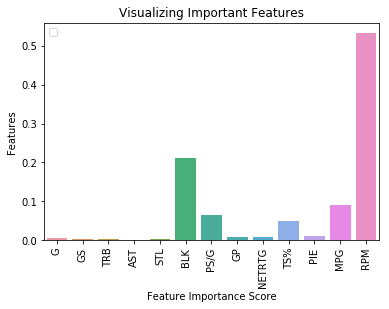

In [278]:
sns.barplot(x=feature_list2, y=rf2.feature_importances_)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [279]:
lm2 = LinearRegression()

In [280]:
lm2.fit(train_features2, train_labels2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [281]:
predreg3 = lm2.predict(test_features2)

In [282]:
print(mean_squared_error(test_labels2, predreg3)**0.5)
print(np.mean(test_labels2))

389.3158944423413
126.7566371681416


In [283]:
pred_diff3 = predreg3 - test_labels2
mostor2 = np.argmin(pred_diff3)
mostud2 = np.argmax(pred_diff3)
print(mostor2)
print(mostud2)
print(testplayers2[mostor2])
print(testplayers2[mostud2])

39
92
Tristan Thompson
Isaiah Thomas


In [284]:
neigh = KNeighborsRegressor()
neigh.fit(train_features2, train_labels2) 
neigh.predict(test_features2)
print(mean_squared_error(test_labels1, neigh.predict(test_features2))**0.5)
mostor = np.argmin(neigh.predict(test_features2))
mostud = np.argmax(neigh.predict(test_features2))
print(mostor)
print(mostud)
print(testplayers[mostor])
print(testplayers[mostud])
neigh.kneighbors(np.atleast_2d(test_features2[99]), 5)
fivenear = neigh.kneighbors(np.atleast_2d(test_features2[99]), 5)[1]
for i in fivenear:
    print(trainplayers[i])


970.8842949421575
1
105
Greivis Vasquez
Kristaps Porzingis
['Blake Griffin' 'Danilo Gallinari' 'Mike Conley' 'Clint Capela'
 'Nikola Jokic']


In [285]:
scores = cross_val_score(lm2, features2, labels2, cv=5)

In [286]:
print(scores)

[ 0.21791081  0.1300919  -0.83473214  0.05769235 -0.6832567 ]


No handles with labels found to put in legend.


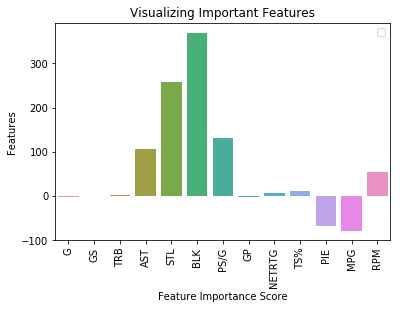

In [287]:
sns.barplot(x=feature_list2, y=lm2.coef_)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Text(0, 0.5, 'TWITTER_FAVORITE_COUNT')

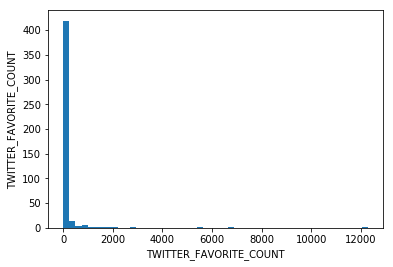

In [288]:
plt.hist(nba_final_df['TWITTER_FAVORITE_COUNT'], bins=50)
plt.xlabel('TWITTER_FAVORITE_COUNT')
plt.ylabel('TWITTER_FAVORITE_COUNT')

In [289]:
nba_final_df6 = nba_final_df

In [290]:
print(nba_final_df6.info)

<bound method DataFrame.info of                 PLAYER TEAM_SH   G  GS    MP   TRB   AST  STL  BLK  PS/G  ...  \
0       Kris Humphries     ATL  56   4  12.3   3.7   0.5  0.3  0.4   4.6  ...   
1      DeAndre' Bembry     ATL  38   1   9.8   1.6   0.7  0.2  0.1   2.7  ...   
2      Thabo Sefolosha     ATL  62  42  25.7   4.4   1.7  1.5  0.5   7.2  ...   
3           Ryan Kelly     ATL  16   0   6.9   1.1   0.5  0.3  0.3   1.6  ...   
4      Dennis Schroder     ATL  79  78  31.5   3.1   6.3  0.9  0.2  17.9  ...   
5        Dwight Howard     ATL  74  74  29.7  12.7   1.4  0.9  1.2  13.5  ...   
6         Paul Millsap     ATL  69  67  34.0   7.7   3.7  1.3  0.9  18.1  ...   
7      DeAndre' Bembry     ATL  38   1   9.8   1.6   0.7  0.2  0.1   2.7  ...   
8        Kent Bazemore     ATL  73  64  26.9   3.2   2.4  1.2  0.7  11.0  ...   
9         Mike Muscala     ATL  70   3  17.7   3.4   1.4  0.4  0.6   6.2  ...   
10     Lamar Patterson     ATL   5   0   8.0   1.4   1.2  0.2  0.0   1.8  ...

In [291]:
nba_final_df6['FULL_SOCIAL_MEDIA'] = nba_final_df6['TWITTER_FAVORITE_COUNT'] + nba_final_df6['TWITTER_RETWEET_COUNT']

In [292]:
nba_final_df6['FULL_BASIC_STATS'] = nba_final_df6['TRB'] + nba_final_df6['AST'] + nba_final_df6['STL'] + nba_final_df6['BLK'] + nba_final_df6['PS/G'] 

In [293]:
# Labels are the values we want to predict
labels3 = np.array(nba_final_df6['FULL_SOCIAL_MEDIA'])
# Remove the labels from the features
# axis 1 refers to the columns
features2 = nba_final_df6.drop('FULL_SOCIAL_MEDIA', axis = 1)
features2 = features2.drop('TWITTER_FAVORITE_COUNT', axis = 1)
features2 = features2.drop('TWITTER_RETWEET_COUNT', axis = 1)
features2 = features2.drop('pageviews', axis = 1)
features2 = features2.drop('PLAYER', axis = 1)
features2 = features2.drop('TEAM_SH', axis = 1) 
features2 = features2.drop('TEAM', axis = 1)
features2 = features2.drop('SALARY', axis = 1)
features2 = features2.drop('MP', axis = 1)
features2 = features2.drop('WINS', axis = 1)
features2 = features2.drop('TRB', axis = 1)
features2 = features2.drop('AST', axis = 1)
features2 = features2.drop('STL', axis = 1)
features2 = features2.drop('BLK', axis = 1)
features2 = features2.drop('PS/G', axis = 1)
features2 = features2.drop('W', axis = 1)
features2 = features2.drop('L', axis = 1)
features2 = features2.drop('AVG', axis = 1)
features2 = features2.drop('PCT', axis = 1)
# Saving feature names for later use
feature_list2 = list(features2.columns)
# Convert to numpy array
features2 = np.array(features2)

In [294]:
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(features2, labels3, test_size = 0.25, random_state = 42)

In [295]:
_,testplayers2,_,_ = train_test_split(nba_final_df4.PLAYER.values, nba_final_df4.PLAYER.values, test_size = 0.25, random_state = 42)

In [296]:
rf2 = RandomForestRegressor(random_state = 42)
rf2.fit(train_features2, train_labels2)

C:\Users\ngmat\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [297]:
pred2 = rf2.predict(test_features2)

In [298]:
print(mean_squared_error(test_labels2, pred2)**0.5)
print(np.mean(test_labels2))

650.4459929591674
126.7566371681416


In [299]:
pred_diff2 = pred2 - test_labels2
mostor2 = np.argmin(pred_diff2)
mostud2 = np.argmax(pred_diff2)
print(mostor2)
print(mostud2)
print(testplayers2[mostor2])
print(testplayers2[mostud2])

35
104
Kyrie Irving
Chris Paul


In [300]:
scores = cross_val_score(rf2, features2, labels3, cv=5)

In [301]:
print(scores)

[ 0.34405021  0.32411672 -1.20614464  0.10276348  0.26124711]


No handles with labels found to put in legend.


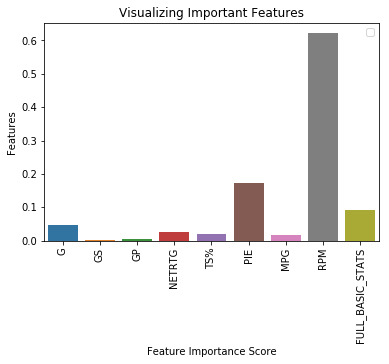

In [302]:
sns.barplot(x=feature_list2, y=rf2.feature_importances_)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [303]:
lm2 = LinearRegression()

In [304]:
lm2.fit(train_features2, train_labels2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [305]:
predreg3 = lm2.predict(test_features2)

In [306]:
print(mean_squared_error(test_labels2, predreg3)**0.5)
print(np.mean(test_labels2))

352.3056612353444
126.7566371681416


In [307]:
pred_diff3 = predreg3 - test_labels2
mostor2 = np.argmin(pred_diff3)
mostud2 = np.argmax(pred_diff3)
print(mostor2)
print(mostud2)
print(testplayers2[mostor2])
print(testplayers2[mostud2])

35
92
Kyrie Irving
Isaiah Thomas


In [308]:
scores = cross_val_score(lm2, features2, labels3, cv=5)

In [309]:
print(scores)

[ 0.32045886  0.14606235 -0.69240981  0.20606522 -0.45185724]


No handles with labels found to put in legend.


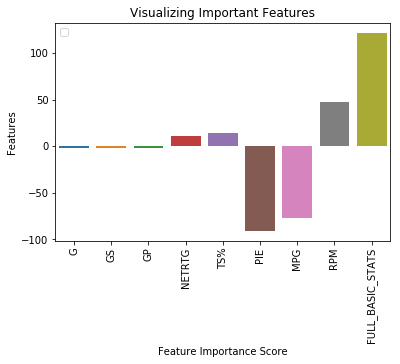

In [310]:
sns.barplot(x=feature_list2, y=lm2.coef_)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [404]:
neigh = KNeighborsRegressor()
neigh.fit(train_features2, train_labels2) 
neigh.predict(test_features2)
print(mean_squared_error(test_labels2, neigh.predict(test_features2))**0.5)
mostor = np.argmin(neigh.predict(test_features2))
mostud = np.argmax(neigh.predict(test_features2))
print(mostor)
print(mostud)
print(testplayers[mostor])
print(testplayers[mostud])
neigh.kneighbors(np.atleast_2d(test_features2[59]), 5)
fivenear = neigh.kneighbors(np.atleast_2d(test_features2[59]), 5)[1]
for i in fivenear:
    print(trainplayers[i])



362.08181078192126
1
59
Greivis Vasquez
Rudy Gobert
['DeAndre Jordan' 'Bradley Beal' 'Stephen Curry' 'Kemba Walker'
 'Myles Turner']


In [363]:
print(nba_final_df6.columns)

Index(['PLAYER', 'TEAM_SH', 'G', 'GS', 'MP', 'TRB', 'AST', 'STL', 'BLK',
       'PS/G', 'GP', 'W', 'L', 'NETRTG', 'TS%', 'PIE', 'MPG', 'RPM', 'WINS',
       'pageviews', 'TWITTER_FAVORITE_COUNT', 'TWITTER_RETWEET_COUNT', 'TEAM',
       'SALARY', 'AVG', 'PCT', 'FULL_SOCIAL_MEDIA', 'FULL_BASIC_STATS'],
      dtype='object')


In [375]:
newdf = nba_final_df6

In [376]:
newdf2 = nba_final_df6

In [377]:
# Labels are the values we want to predict
labels3 = np.array(newdf2['FULL_SOCIAL_MEDIA'])
# Remove the labels from the features
# axis 1 refers to the columns
features2 = newdf2.drop('FULL_SOCIAL_MEDIA', axis = 1)
features2 = features2.drop('TWITTER_FAVORITE_COUNT', axis = 1)
features2 = features2.drop('TWITTER_RETWEET_COUNT', axis = 1)
features2 = features2.drop('pageviews', axis = 1)
features2 = features2.drop('PLAYER', axis = 1)
features2 = features2.drop('TEAM_SH', axis = 1) 
features2 = features2.drop('TEAM', axis = 1)
features2 = features2.drop('SALARY', axis = 1)
features2 = features2.drop('MP', axis = 1)
features2 = features2.drop('WINS', axis = 1)
features2 = features2.drop('TRB', axis = 1)
features2 = features2.drop('AST', axis = 1)
features2 = features2.drop('STL', axis = 1)
features2 = features2.drop('BLK', axis = 1)
features2 = features2.drop('PS/G', axis = 1)
features2 = features2.drop('W', axis = 1)
features2 = features2.drop('L', axis = 1)
features2 = features2.drop('AVG', axis = 1)
features2 = features2.drop('PCT', axis = 1)
# Saving feature names for later use
feature_list2 = list(features2.columns)
# Convert to numpy array
features2 = np.array(features2)

In [378]:
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(features2, labels3, test_size = 0.25, random_state = 42)

In [395]:
items= dict()
feature5 = features2
features6 = np.delete(feature5, 1, 0)
neigh2 = KNeighborsRegressor()
for i in range(len(newdf.index)):
    features3 = features2
    labels4 = labels3
    features4 = np.delete(features3, (i), 0)
    labels5 = np.delete(labels4, (i), 0)
    neigh2.fit(features4, labels5) 
    neigh2.predict(np.atleast_2d(features3[i]))
    fivenear = neigh2.kneighbors(np.atleast_2d(features3[i]), 3)[1]
    items.update({newdf.iloc[i]['PLAYER'] : fivenear})
print(items)


{'Kris Humphries': array([[402, 450, 389]], dtype=int64), "DeAndre' Bembry": array([[  1, 111,  76]], dtype=int64), 'Thabo Sefolosha': array([[414, 256, 219]], dtype=int64), 'Ryan Kelly': array([[116, 245, 328]], dtype=int64), 'Dennis Schroder': array([[ 91, 312, 393]], dtype=int64), 'Dwight Howard': array([[ 39, 207, 215]], dtype=int64), 'Paul Millsap': array([[ 18, 192, 253]], dtype=int64), 'Kent Bazemore': array([[194, 216, 377]], dtype=int64), 'Mike Muscala': array([[444, 209,  47]], dtype=int64), 'Lamar Patterson': array([[241,  95, 119]], dtype=int64), 'Malcolm Delaney': array([[435,  26, 110]], dtype=int64), 'Mike Scott': array([[283, 181, 379]], dtype=int64), 'Jaylen Brown': array([[376, 339,  80]], dtype=int64), 'Gerald Green': array([[ 21, 136, 429]], dtype=int64), 'Jordan Mickey': array([[146, 181, 179]], dtype=int64), 'Jonas Jerebko': array([[149, 129, 354]], dtype=int64), 'Isaiah Thomas': array([[330, 158,  53]], dtype=int64), 'Demetrius Jackson': array([[ 18, 434, 281]], 

In [396]:
##Rudy Gobert': 173, 443, 125,

In [383]:
print(newdf.iloc[173]['PLAYER'])

DeAndre Jordan


In [392]:
print(newdf.iloc[125]['PLAYER'])

Stephen Curry


In [393]:
print(newdf.iloc[443]['PLAYER'])

Markieff Morris
